In [106]:
import pandas as pd
import numpy as np

In [107]:
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', True)

In [108]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

In [109]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [110]:
df=pd.read_csv('data_perovskites.csv')

In [111]:
new_data=pd.read_csv('rhombohedral.csv')

In [112]:
en_bl=pd.read_csv('Electronegativity and bond lengths.csv')

In [113]:
wp1=df.drop(['Formation energy [eV/atom]','Stability [eV/atom]','Magnetic moment [mu_B]','Volume per atom [A^3/atom]','a [ang]','b [ang]','c [ang]','alpha [deg]','beta [deg]','gamma [deg]','Vacancy energy [eV/O atom]','Band gap [eV]'],axis=1)

In [114]:
wp1=wp1[wp1['Lowest distortion']!='-']

In [115]:
wp1['Lowest distortion'].value_counts()*100/5276

cubic           61.656558
orthorhombic    29.814253
rhombohedral     6.122062
tetragonal       2.407127
Name: Lowest distortion, dtype: float64

In [116]:
wp1['Goldschmidt Tolerance']=(wp1['Radius A [ang]']+1.4)/((2**.5)*(wp1['Radius B [ang]']+1.4))

In [117]:
wp1['Octahedral factor']=(wp1['Radius B [ang]']/1.4)

In [118]:
wp2=wp1[(wp1['Goldschmidt Tolerance'] >= 0.6) & (wp1['Goldschmidt Tolerance'] <= 1.1)]

In [119]:
wp3=wp2[(wp2['Octahedral factor'] >= 0.414) & (wp2['Octahedral factor'] <= 0.732)]

In [120]:
wp3['Lowest distortion'].value_counts()* 100/3699

cubic           63.963233
orthorhombic    28.899703
rhombohedral     5.406867
tetragonal       1.730197
Name: Lowest distortion, dtype: float64

In [121]:
wp3=wp3[wp3['Valence A']!='not balanced']

In [122]:
wp3=wp3[wp3['Valence A']!='element not in BV']

In [123]:
wp3

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor
81,AgBiO3,Ag,Bi,False,1,5,1.28,0.76,rhombohedral,0.877336,0.542857
107,AgMoO3,Ag,Mo,False,1,5,1.28,0.61,cubic,0.942809,0.435714
109,AgNbO3,Ag,Nb,True,1,5,1.28,0.64,rhombohedral,0.928944,0.457143
122,AgReO3,Ag,Re,False,1,5,1.28,0.58,cubic,0.957094,0.414286
125,AgSbO3,Ag,Sb,True,1,5,1.28,0.60,orthorhombic,0.947523,0.428571
...,...,...,...,...,...,...,...,...,...,...,...
5308,ZrSbO3,Zr,Sb,False,1,5,0.89,0.60,cubic,0.809637,0.428571
5314,ZrTaO3,Zr,Ta,False,1,5,0.89,0.64,cubic,0.793762,0.457143
5319,ZrTiO3,Zr,Ti,False,2,4,0.89,0.61,cubic,0.805609,0.435714
5322,ZrUO3,Zr,U,False,1,5,0.89,0.76,orthorhombic,0.749664,0.542857


In [124]:
wp3= pd.concat([wp3,pd.get_dummies(wp3['Valence A'])],axis=1)
wp3.drop(['Valence A'],axis=1, inplace=True)

In [125]:
#wp3['Valence A']=pd.to_numeric(wp3['Valence A'],downcast='float')
#wp3['Valence B']=pd.to_numeric(wp3['Valence B'],downcast='float')

In [126]:
wp3

,Chemical formula,A,B,In literature,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,5
81,AgBiO3,Ag,Bi,False,5,1.28,0.76,rhombohedral,0.877336,0.542857,1,0,0,0,0
107,AgMoO3,Ag,Mo,False,5,1.28,0.61,cubic,0.942809,0.435714,1,0,0,0,0
109,AgNbO3,Ag,Nb,True,5,1.28,0.64,rhombohedral,0.928944,0.457143,1,0,0,0,0
122,AgReO3,Ag,Re,False,5,1.28,0.58,cubic,0.957094,0.414286,1,0,0,0,0
125,AgSbO3,Ag,Sb,True,5,1.28,0.60,orthorhombic,0.947523,0.428571,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,ZrSbO3,Zr,Sb,False,5,0.89,0.60,cubic,0.809637,0.428571,1,0,0,0,0
5314,ZrTaO3,Zr,Ta,False,5,0.89,0.64,cubic,0.793762,0.457143,1,0,0,0,0
5319,ZrTiO3,Zr,Ti,False,4,0.89,0.61,cubic,0.805609,0.435714,0,1,0,0,0
5322,ZrUO3,Zr,U,False,5,0.89,0.76,orthorhombic,0.749664,0.542857,1,0,0,0,0


In [127]:
new_data=new_data[new_data['Valence A']!='not balanced']
new_data=new_data[new_data['Valence A']!='element not in BV']

In [128]:
new_data

,ABO3,A,B,Valence A,Valence B,Lowest distortion,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],tG,tR,Octahedral factor,VA,VB,VA/VB
76,AgAsO3,Ag,As,1,5,tetragonal,1.28,0.95,0.46,1.018995909,0.923839,0.328571429,45.369932,8.579808,5.287989
78,AgBO3,Ag,B,3,3,cubic,0.75,0.95,0.27,0.910484547,1.358334,0.192857143,23.424975,6.209951,3.772168
81,AgBiO3,Ag,Bi,1,5,rhombohedral,1.28,0.95,0.76,0.877468699,0.911822,0.542857143,45.369932,13.436928,3.376511
86,AgCrO3,Ag,Cr,1,5,orthorhombic,1.28,0.95,0.49,1.002821371,0.921930,0.35,45.369932,9.001692,5.040156
100,AgIrO3,Ag,Ir,1,5,rhombohedral,1.28,0.95,0.57,0.96209766,0.917682,0.407142857,45.369932,10.193831,4.450725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,ZrTaO3,Zr,Ta,1,5,cubic,0.89,0.72,0.64,0.793881909,0.892546,0.457142857,28.305459,11.319552,2.500581
5319,ZrTiO3,Zr,Ti,2,4,cubic,0.89,0.72,0.61,0.805730893,0.892978,0.435714286,28.305459,10.827468,2.614227
5322,ZrUO3,Zr,U,1,5,orthorhombic,0.89,0.72,0.76,0.749777359,0.892076,0.542857143,28.305459,13.436928,2.106542
5323,ZrVO3,Zr,V,1,5,cubic,0.89,0.72,0.54,0.834803657,0.894528,0.385714286,28.305459,9.735179,2.907544


In [129]:
new_data=new_data[['ABO3','rA at 12 [ang]','rA at 6 [ang]','rB at 6 [ang]','VA/VB','tR','VA','VB']]

In [130]:
en_bl.drop(['A','B'],axis=1)

,ABO3,EN of A,EN of B,Bond length of A,Bond length of B
0,Ac2O3,1.10,1.10,0.00000,0.000000
1,AcAgO3,1.10,1.93,0.00000,2.488353
2,AcAlO3,1.10,1.61,0.00000,1.892894
3,AcAsO3,1.10,2.18,0.00000,1.932227
4,AcAuO3,1.10,2.54,0.00000,2.313698
...,...,...,...,...,...
5324,ZrWO3,1.33,2.36,2.38342,1.745600
5325,ZrYO3,1.33,1.22,2.38342,2.235124
5326,ZrYbO3,1.33,1.10,2.38342,2.223981
5327,ZrZnO3,1.33,1.65,2.38342,2.096141


In [131]:
wp33=pd.merge(wp3,new_data,how='left',left_on='Chemical formula',right_on='ABO3')

In [132]:
wp33

,Chemical formula,A,B,In literature,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,5,ABO3,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB
0,AgBiO3,Ag,Bi,False,5,1.28,0.76,rhombohedral,0.877336,0.542857,1,0,0,0,0,AgBiO3,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928
1,AgMoO3,Ag,Mo,False,5,1.28,0.61,cubic,0.942809,0.435714,1,0,0,0,0,AgMoO3,1.28,0.95,0.61,4.190262,0.915983,45.369932,10.827468
2,AgNbO3,Ag,Nb,True,5,1.28,0.64,rhombohedral,0.928944,0.457143,1,0,0,0,0,AgNbO3,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552
3,AgReO3,Ag,Re,False,5,1.28,0.58,cubic,0.957094,0.414286,1,0,0,0,0,AgReO3,1.28,0.95,0.58,4.383629,0.917231,45.369932,10.349856
4,AgSbO3,Ag,Sb,True,5,1.28,0.60,orthorhombic,0.947523,0.428571,1,0,0,0,0,AgSbO3,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,ZrSbO3,Zr,Sb,False,5,0.89,0.60,cubic,0.809637,0.428571,1,0,0,0,0,ZrSbO3,0.89,0.72,0.60,2.653637,0.893152,28.305459,10.666667
1688,ZrTaO3,Zr,Ta,False,5,0.89,0.64,cubic,0.793762,0.457143,1,0,0,0,0,ZrTaO3,0.89,0.72,0.64,2.500581,0.892546,28.305459,11.319552
1689,ZrTiO3,Zr,Ti,False,4,0.89,0.61,cubic,0.805609,0.435714,0,1,0,0,0,ZrTiO3,0.89,0.72,0.61,2.614227,0.892978,28.305459,10.827468
1690,ZrUO3,Zr,U,False,5,0.89,0.76,orthorhombic,0.749664,0.542857,1,0,0,0,0,ZrUO3,0.89,0.72,0.76,2.106542,0.892076,28.305459,13.436928


In [133]:
wp33=pd.merge(wp33,en_bl,how='left',left_on='Chemical formula',right_on='ABO3')

In [134]:
wp33

,Chemical formula,A_x,B_x,In literature,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,5,ABO3_x,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,ABO3_y,A_y,B_y,EN of A,EN of B,Bond length of A,Bond length of B
0,AgBiO3,Ag,Bi,False,5,1.28,0.76,rhombohedral,0.877336,0.542857,1,0,0,0,0,AgBiO3,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,AgBiO3,Ag,Bi,1.93,2.02,2.761453,2.215655
1,AgMoO3,Ag,Mo,False,5,1.28,0.61,cubic,0.942809,0.435714,1,0,0,0,0,AgMoO3,1.28,0.95,0.61,4.190262,0.915983,45.369932,10.827468,AgMoO3,Ag,Mo,1.93,2.16,2.761453,1.789300
2,AgNbO3,Ag,Nb,True,5,1.28,0.64,rhombohedral,0.928944,0.457143,1,0,0,0,0,AgNbO3,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,AgNbO3,Ag,Nb,1.93,1.60,2.761453,1.955055
3,AgReO3,Ag,Re,False,5,1.28,0.58,cubic,0.957094,0.414286,1,0,0,0,0,AgReO3,1.28,0.95,0.58,4.383629,0.917231,45.369932,10.349856,AgReO3,Ag,Re,1.93,1.90,2.761453,1.987971
4,AgSbO3,Ag,Sb,True,5,1.28,0.60,orthorhombic,0.947523,0.428571,1,0,0,0,0,AgSbO3,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667,AgSbO3,Ag,Sb,1.93,2.05,2.761453,2.075849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,ZrSbO3,Zr,Sb,False,5,0.89,0.60,cubic,0.809637,0.428571,1,0,0,0,0,ZrSbO3,0.89,0.72,0.60,2.653637,0.893152,28.305459,10.666667,ZrSbO3,Zr,Sb,1.33,2.05,2.383420,2.075849
1688,ZrTaO3,Zr,Ta,False,5,0.89,0.64,cubic,0.793762,0.457143,1,0,0,0,0,ZrTaO3,0.89,0.72,0.64,2.500581,0.892546,28.305459,11.319552,ZrTaO3,Zr,Ta,1.33,1.50,2.383420,1.956808
1689,ZrTiO3,Zr,Ti,False,4,0.89,0.61,cubic,0.805609,0.435714,0,1,0,0,0,ZrTiO3,0.89,0.72,0.61,2.614227,0.892978,28.305459,10.827468,ZrTiO3,Zr,Ti,1.33,1.54,2.383420,1.927849
1690,ZrUO3,Zr,U,False,5,0.89,0.76,orthorhombic,0.749664,0.542857,1,0,0,0,0,ZrUO3,0.89,0.72,0.76,2.106542,0.892076,28.305459,13.436928,ZrUO3,Zr,U,1.33,1.38,2.383420,2.047800


In [136]:
wp33

,Chemical formula,A_x,B_x,In literature,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,5,ABO3_x,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,ABO3_y,A_y,B_y,EN of A,EN of B,Bond length of A,Bond length of B
0,AgBiO3,Ag,Bi,False,5,1.28,0.76,rhombohedral,0.877336,0.542857,1,0,0,0,0,AgBiO3,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,AgBiO3,Ag,Bi,1.93,2.02,2.761453,2.215655
1,AgMoO3,Ag,Mo,False,5,1.28,0.61,cubic,0.942809,0.435714,1,0,0,0,0,AgMoO3,1.28,0.95,0.61,4.190262,0.915983,45.369932,10.827468,AgMoO3,Ag,Mo,1.93,2.16,2.761453,1.789300
2,AgNbO3,Ag,Nb,True,5,1.28,0.64,rhombohedral,0.928944,0.457143,1,0,0,0,0,AgNbO3,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,AgNbO3,Ag,Nb,1.93,1.60,2.761453,1.955055
3,AgReO3,Ag,Re,False,5,1.28,0.58,cubic,0.957094,0.414286,1,0,0,0,0,AgReO3,1.28,0.95,0.58,4.383629,0.917231,45.369932,10.349856,AgReO3,Ag,Re,1.93,1.90,2.761453,1.987971
4,AgSbO3,Ag,Sb,True,5,1.28,0.60,orthorhombic,0.947523,0.428571,1,0,0,0,0,AgSbO3,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667,AgSbO3,Ag,Sb,1.93,2.05,2.761453,2.075849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,ZrSbO3,Zr,Sb,False,5,0.89,0.60,cubic,0.809637,0.428571,1,0,0,0,0,ZrSbO3,0.89,0.72,0.60,2.653637,0.893152,28.305459,10.666667,ZrSbO3,Zr,Sb,1.33,2.05,2.383420,2.075849
1688,ZrTaO3,Zr,Ta,False,5,0.89,0.64,cubic,0.793762,0.457143,1,0,0,0,0,ZrTaO3,0.89,0.72,0.64,2.500581,0.892546,28.305459,11.319552,ZrTaO3,Zr,Ta,1.33,1.50,2.383420,1.956808
1689,ZrTiO3,Zr,Ti,False,4,0.89,0.61,cubic,0.805609,0.435714,0,1,0,0,0,ZrTiO3,0.89,0.72,0.61,2.614227,0.892978,28.305459,10.827468,ZrTiO3,Zr,Ti,1.33,1.54,2.383420,1.927849
1690,ZrUO3,Zr,U,False,5,0.89,0.76,orthorhombic,0.749664,0.542857,1,0,0,0,0,ZrUO3,0.89,0.72,0.76,2.106542,0.892076,28.305459,13.436928,ZrUO3,Zr,U,1.33,1.38,2.383420,2.047800


In [137]:
wp33['New Tolerance Factor']=((wp33['rA at 6 [ang]']/wp33['rA at 12 [ang]'])/3)*((wp33['Radius A [ang]']+1.4)/(wp33['Radius B [ang]']+1.4))*((wp33['Radius B [ang]']+1.4)/1.4*(2**0.5))*((wp33['Radius A [ang]']+1.4)/1.4*(2**0.5))

In [138]:
#supposed_rhom = wp11[(wp11['New Tolerance Factor'] >= 0.9) & (wp11['New Tolerance Factor'] <= 1.1)]

In [139]:
#supposed_rhom['Lowest distortion'].value_counts()

In [140]:
wp33['EN diff with radius']=((wp33['Radius A [ang]']/1.4)*(wp33['EN of B']-3.44)+(wp33['Radius B [ang]']/1.4)*(wp33['EN of A']-6.88))/2

In [141]:
#wp33['radius diff']=(wp33['Radius A [ang]']-wp33['Radius B [ang]'])

In [142]:
wp33

,Chemical formula,A_x,B_x,In literature,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,5,ABO3_x,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,ABO3_y,A_y,B_y,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor,EN diff with radius
0,AgBiO3,Ag,Bi,False,5,1.28,0.76,rhombohedral,0.877336,0.542857,1,0,0,0,0,AgBiO3,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,AgBiO3,Ag,Bi,1.93,2.02,2.761453,2.215655,1.813159,-1.992714
1,AgMoO3,Ag,Mo,False,5,1.28,0.61,cubic,0.942809,0.435714,1,0,0,0,0,AgMoO3,1.28,0.95,0.61,4.190262,0.915983,45.369932,10.827468,AgMoO3,Ag,Mo,1.93,2.16,2.761453,1.789300,1.813159,-1.663536
2,AgNbO3,Ag,Nb,True,5,1.28,0.64,rhombohedral,0.928944,0.457143,1,0,0,0,0,AgNbO3,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,AgNbO3,Ag,Nb,1.93,1.60,2.761453,1.955055,1.813159,-1.972571
3,AgReO3,Ag,Re,False,5,1.28,0.58,cubic,0.957094,0.414286,1,0,0,0,0,AgReO3,1.28,0.95,0.58,4.383629,0.917231,45.369932,10.349856,AgReO3,Ag,Re,1.93,1.90,2.761453,1.987971,1.813159,-1.729357
4,AgSbO3,Ag,Sb,True,5,1.28,0.60,orthorhombic,0.947523,0.428571,1,0,0,0,0,AgSbO3,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667,AgSbO3,Ag,Sb,1.93,2.05,2.761453,2.075849,1.813159,-1.696143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,ZrSbO3,Zr,Sb,False,5,0.89,0.60,cubic,0.809637,0.428571,1,0,0,0,0,ZrSbO3,0.89,0.72,0.60,2.653637,0.893152,28.305459,10.666667,ZrSbO3,Zr,Sb,1.33,2.05,2.383420,2.075849,1.442999,-1.631107
1688,ZrTaO3,Zr,Ta,False,5,0.89,0.64,cubic,0.793762,0.457143,1,0,0,0,0,ZrTaO3,0.89,0.72,0.64,2.500581,0.892546,28.305459,11.319552,ZrTaO3,Zr,Ta,1.33,1.50,2.383420,1.956808,1.442999,-1.885214
1689,ZrTiO3,Zr,Ti,False,4,0.89,0.61,cubic,0.805609,0.435714,0,1,0,0,0,ZrTiO3,0.89,0.72,0.61,2.614227,0.892978,28.305459,10.827468,ZrTiO3,Zr,Ti,1.33,1.54,2.383420,1.927849,1.442999,-1.813036
1690,ZrUO3,Zr,U,False,5,0.89,0.76,orthorhombic,0.749664,0.542857,1,0,0,0,0,ZrUO3,0.89,0.72,0.76,2.106542,0.892076,28.305459,13.436928,ZrUO3,Zr,U,1.33,1.38,2.383420,2.047800,1.442999,-2.161214


## See how crystal structure varies with Valency

In [143]:
wp33['1'].dtypes

dtype('uint8')

In [144]:
exp_true=wp33[wp33['In literature']==True]

In [145]:
exp_true

,Chemical formula,A_x,B_x,In literature,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,5,ABO3_x,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,ABO3_y,A_y,B_y,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor,EN diff with radius
2,AgNbO3,Ag,Nb,True,5,1.28,0.64,rhombohedral,0.928944,0.457143,1,0,0,0,0,AgNbO3,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,AgNbO3,Ag,Nb,1.93,1.60,2.761453,1.955055,1.813159,-1.972571
4,AgSbO3,Ag,Sb,True,5,1.28,0.60,orthorhombic,0.947523,0.428571,1,0,0,0,0,AgSbO3,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667,AgSbO3,Ag,Sb,1.93,2.05,2.761453,2.075849,1.813159,-1.696143
5,AgTaO3,Ag,Ta,True,5,1.28,0.64,rhombohedral,0.928944,0.457143,1,0,0,0,0,AgTaO3,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,AgTaO3,Ag,Ta,1.93,1.50,2.761453,1.956808,1.813159,-2.018286
72,BaCeO3,Ba,Ce,True,4,1.61,0.87,orthorhombic,0.937617,0.621429,0,1,0,0,0,BaCeO3,1.61,1.35,0.87,4.121420,1.116111,64.278130,15.596111,BaCeO3,Ba,Ce,0.89,1.12,2.942999,2.268642,2.584006,-3.195179
74,BaHfO3,Ba,Hf,True,4,1.61,0.71,cubic,1.008716,0.507143,0,1,0,0,0,BaHfO3,1.61,1.35,0.71,5.131888,1.121624,64.278130,12.525241,BaHfO3,Ba,Hf,0.89,1.30,2.942999,2.027412,2.584006,-2.749393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,YbCrO3,Yb,Cr,True,3,1.04,0.62,orthorhombic,0.854129,0.442857,0,0,1,0,0,YbCrO3,1.04,0.95,0.62,3.115591,1.053800,34.239958,10.989877,YbCrO3,Yb,Cr,1.10,1.66,2.519261,1.960053,1.849791,-1.941000
1618,YbFeO3,Yb,Fe,True,3,1.04,0.65,orthorhombic,0.841630,0.464286,0,0,1,0,0,YbFeO3,1.04,0.95,0.65,2.980800,1.053032,34.239958,11.486833,YbFeO3,Yb,Fe,1.10,1.83,2.519261,1.999522,1.849791,-1.939786
1629,YbNiO3,Yb,Ni,True,3,1.04,0.60,orthorhombic,0.862670,0.428571,0,0,1,0,0,YbNiO3,1.04,0.95,0.60,3.209996,1.054402,34.239958,10.666667,YbNiO3,Yb,Ni,1.10,1.91,2.519261,2.103725,1.849791,-1.806857
1644,YbTiO3,Yb,Ti,True,4,1.14,0.61,orthorhombic,0.893558,0.435714,0,1,0,0,0,YbTiO3,1.14,0.95,0.61,3.567286,0.989479,38.624680,10.827468,YbTiO3,Yb,Ti,1.10,1.54,2.519261,1.927849,1.828685,-2.032786


In [146]:
exp_false=wp33[wp33['In literature']==False]

In [147]:
categorical = wp33.select_dtypes(include=[np.object])

numeric = wp33.select_dtypes(include=[np.int,np.float32,np.float,np.int32,np.uint8])
numeric_cols = numeric.columns

In [148]:
true_categorical = exp_true.select_dtypes(include=[np.object])

true_numeric = exp_true.select_dtypes(include=[np.int,np.float32,np.float,np.int32,np.uint8])
true_numeric_cols = numeric.columns

In [149]:
false_categorical = exp_false.select_dtypes(include=[np.object])

false_numeric = exp_false.select_dtypes(include=[np.int,np.float32,np.float,np.int32,np.uint8])
numeric_cols = numeric.columns

In [150]:
categorical

,Chemical formula,A_x,B_x,Valence B,Lowest distortion,ABO3_x,ABO3_y,A_y,B_y
0,AgBiO3,Ag,Bi,5,rhombohedral,AgBiO3,AgBiO3,Ag,Bi
1,AgMoO3,Ag,Mo,5,cubic,AgMoO3,AgMoO3,Ag,Mo
3,AgReO3,Ag,Re,5,cubic,AgReO3,AgReO3,Ag,Re
6,AgUO3,Ag,U,5,rhombohedral,AgUO3,AgUO3,Ag,U
7,AgWO3,Ag,W,5,cubic,AgWO3,AgWO3,Ag,W
...,...,...,...,...,...,...,...,...,...
1687,ZrSbO3,Zr,Sb,5,cubic,ZrSbO3,ZrSbO3,Zr,Sb
1688,ZrTaO3,Zr,Ta,5,cubic,ZrTaO3,ZrTaO3,Zr,Ta
1689,ZrTiO3,Zr,Ti,4,cubic,ZrTiO3,ZrTiO3,Zr,Ti
1690,ZrUO3,Zr,U,5,orthorhombic,ZrUO3,ZrUO3,Zr,U


In [151]:
numeric

,Radius A [ang],Radius B [ang],Goldschmidt Tolerance,Octahedral factor,1,2,3,4,5,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor,EN diff with radius
0,1.28,0.76,0.877336,0.542857,1,0,0,0,0,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,1.93,2.02,2.761453,2.215655,1.813159,-1.992714
1,1.28,0.61,0.942809,0.435714,1,0,0,0,0,1.28,0.95,0.61,4.190262,0.915983,45.369932,10.827468,1.93,2.16,2.761453,1.789300,1.813159,-1.663536
2,1.28,0.64,0.928944,0.457143,1,0,0,0,0,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,1.93,1.60,2.761453,1.955055,1.813159,-1.972571
3,1.28,0.58,0.957094,0.414286,1,0,0,0,0,1.28,0.95,0.58,4.383629,0.917231,45.369932,10.349856,1.93,1.90,2.761453,1.987971,1.813159,-1.729357
4,1.28,0.60,0.947523,0.428571,1,0,0,0,0,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667,1.93,2.05,2.761453,2.075849,1.813159,-1.696143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,0.89,0.60,0.809637,0.428571,1,0,0,0,0,0.89,0.72,0.60,2.653637,0.893152,28.305459,10.666667,1.33,2.05,2.383420,2.075849,1.442999,-1.631107
1688,0.89,0.64,0.793762,0.457143,1,0,0,0,0,0.89,0.72,0.64,2.500581,0.892546,28.305459,11.319552,1.33,1.50,2.383420,1.956808,1.442999,-1.885214
1689,0.89,0.61,0.805609,0.435714,0,1,0,0,0,0.89,0.72,0.61,2.614227,0.892978,28.305459,10.827468,1.33,1.54,2.383420,1.927849,1.442999,-1.813036
1690,0.89,0.76,0.749664,0.542857,1,0,0,0,0,0.89,0.72,0.76,2.106542,0.892076,28.305459,13.436928,1.33,1.38,2.383420,2.047800,1.442999,-2.161214


In [152]:
corr = numeric.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Radius A [ang],Radius B [ang],Goldschmidt Tolerance,Octahedral factor,1,2,3,4,5,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor,EN diff with radius
Radius A [ang],1.00,-0.00,0.90,-0.00,0.10,0.09,-0.11,-0.03,-0.12,1.00,0.92,-0.00,0.89,0.07,0.99,0.00,-0.63,0.01,0.89,-0.01,0.87,-0.57
Radius B [ang],-0.00,1.00,-0.43,1.00,-0.19,-0.15,0.19,0.13,0.01,-0.00,0.00,1.00,-0.41,0.01,-0.01,1.00,0.00,-0.58,-0.01,0.73,-0.00,-0.74
Goldschmidt Tolerance,0.90,-0.43,1.00,-0.43,0.18,0.14,-0.18,-0.08,-0.11,0.90,0.83,-0.43,0.99,0.06,0.90,-0.43,-0.56,0.26,0.81,-0.33,0.79,-0.19
Octahedral factor,-0.00,1.00,-0.43,1.00,-0.19,-0.15,0.19,0.13,0.01,-0.00,0.00,1.00,-0.41,0.01,-0.01,1.00,0.00,-0.58,-0.01,0.73,-0.00,-0.74
1,0.10,-0.19,0.18,-0.19,1.00,-0.25,-0.27,-0.07,-0.03,0.10,0.12,-0.19,0.19,0.07,0.12,-0.19,-0.05,0.11,0.15,-0.15,0.13,0.09
2,0.09,-0.15,0.14,-0.15,-0.25,1.00,-0.75,-0.20,-0.07,0.09,-0.02,-0.15,0.14,-0.28,0.10,-0.15,0.01,0.14,-0.00,-0.13,-0.04,0.09
3,-0.11,0.19,-0.18,0.19,-0.27,-0.75,1.00,-0.21,-0.08,-0.11,-0.02,0.19,-0.19,0.22,-0.13,0.19,0.01,-0.20,-0.04,0.20,-0.01,-0.12
4,-0.03,0.13,-0.08,0.13,-0.07,-0.20,-0.21,1.00,-0.02,-0.03,-0.02,0.13,-0.08,0.01,-0.03,0.13,-0.03,0.00,-0.06,0.03,-0.02,-0.07
5,-0.12,0.01,-0.11,0.01,-0.03,-0.07,-0.08,-0.02,1.00,-0.12,-0.09,0.01,-0.10,0.08,-0.11,0.00,0.06,-0.03,-0.05,-0.02,-0.07,0.05
rA at 12 [ang],1.00,-0.00,0.90,-0.00,0.10,0.09,-0.11,-0.03,-0.12,1.00,0.92,-0.00,0.89,0.07,0.99,0.00,-0.63,0.01,0.89,-0.01,0.87,-0.57


In [153]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [154]:
numeric.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in numeric.columns.values]

In [155]:
true_numeric.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in numeric.columns.values]

In [156]:
false_numeric.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in numeric.columns.values]

## Building the training set only on True values

In [157]:
exp_false

,Chemical formula,A_x,B_x,In literature,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,5,ABO3_x,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,ABO3_y,A_y,B_y,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor,EN diff with radius
0,AgBiO3,Ag,Bi,False,5,1.28,0.76,rhombohedral,0.877336,0.542857,1,0,0,0,0,AgBiO3,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,AgBiO3,Ag,Bi,1.93,2.02,2.761453,2.215655,1.813159,-1.992714
1,AgMoO3,Ag,Mo,False,5,1.28,0.61,cubic,0.942809,0.435714,1,0,0,0,0,AgMoO3,1.28,0.95,0.61,4.190262,0.915983,45.369932,10.827468,AgMoO3,Ag,Mo,1.93,2.16,2.761453,1.789300,1.813159,-1.663536
3,AgReO3,Ag,Re,False,5,1.28,0.58,cubic,0.957094,0.414286,1,0,0,0,0,AgReO3,1.28,0.95,0.58,4.383629,0.917231,45.369932,10.349856,AgReO3,Ag,Re,1.93,1.90,2.761453,1.987971,1.813159,-1.729357
6,AgUO3,Ag,U,False,5,1.28,0.76,rhombohedral,0.877336,0.542857,1,0,0,0,0,AgUO3,1.28,0.95,0.76,3.376511,0.911822,45.369932,13.436928,AgUO3,Ag,U,1.93,1.38,2.761453,2.047800,1.813159,-2.285286
7,AgWO3,Ag,W,False,5,1.28,0.62,cubic,0.938142,0.442857,1,0,0,0,0,AgWO3,1.28,0.95,0.62,4.128338,0.915600,45.369932,10.989877,AgWO3,Ag,W,1.93,2.36,2.761453,1.745600,1.813159,-1.589786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,ZrSbO3,Zr,Sb,False,5,0.89,0.60,cubic,0.809637,0.428571,1,0,0,0,0,ZrSbO3,0.89,0.72,0.60,2.653637,0.893152,28.305459,10.666667,ZrSbO3,Zr,Sb,1.33,2.05,2.383420,2.075849,1.442999,-1.631107
1688,ZrTaO3,Zr,Ta,False,5,0.89,0.64,cubic,0.793762,0.457143,1,0,0,0,0,ZrTaO3,0.89,0.72,0.64,2.500581,0.892546,28.305459,11.319552,ZrTaO3,Zr,Ta,1.33,1.50,2.383420,1.956808,1.442999,-1.885214
1689,ZrTiO3,Zr,Ti,False,4,0.89,0.61,cubic,0.805609,0.435714,0,1,0,0,0,ZrTiO3,0.89,0.72,0.61,2.614227,0.892978,28.305459,10.827468,ZrTiO3,Zr,Ti,1.33,1.54,2.383420,1.927849,1.442999,-1.813036
1690,ZrUO3,Zr,U,False,5,0.89,0.76,orthorhombic,0.749664,0.542857,1,0,0,0,0,ZrUO3,0.89,0.72,0.76,2.106542,0.892076,28.305459,13.436928,ZrUO3,Zr,U,1.33,1.38,2.383420,2.047800,1.442999,-2.161214


In [158]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [159]:
le_target = LabelEncoder()
exp_false['Lowest distortion']= le_target.fit_transform(exp_false['Lowest distortion'])

In [160]:
exp_true

,Chemical formula,A_x,B_x,In literature,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,5,ABO3_x,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,VA,VB,ABO3_y,A_y,B_y,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor,EN diff with radius
2,AgNbO3,Ag,Nb,True,5,1.28,0.64,rhombohedral,0.928944,0.457143,1,0,0,0,0,AgNbO3,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,AgNbO3,Ag,Nb,1.93,1.60,2.761453,1.955055,1.813159,-1.972571
4,AgSbO3,Ag,Sb,True,5,1.28,0.60,orthorhombic,0.947523,0.428571,1,0,0,0,0,AgSbO3,1.28,0.95,0.60,4.253431,0.916382,45.369932,10.666667,AgSbO3,Ag,Sb,1.93,2.05,2.761453,2.075849,1.813159,-1.696143
5,AgTaO3,Ag,Ta,True,5,1.28,0.64,rhombohedral,0.928944,0.457143,1,0,0,0,0,AgTaO3,1.28,0.95,0.64,4.008103,0.914881,45.369932,11.319552,AgTaO3,Ag,Ta,1.93,1.50,2.761453,1.956808,1.813159,-2.018286
72,BaCeO3,Ba,Ce,True,4,1.61,0.87,orthorhombic,0.937617,0.621429,0,1,0,0,0,BaCeO3,1.61,1.35,0.87,4.121420,1.116111,64.278130,15.596111,BaCeO3,Ba,Ce,0.89,1.12,2.942999,2.268642,2.584006,-3.195179
74,BaHfO3,Ba,Hf,True,4,1.61,0.71,cubic,1.008716,0.507143,0,1,0,0,0,BaHfO3,1.61,1.35,0.71,5.131888,1.121624,64.278130,12.525241,BaHfO3,Ba,Hf,0.89,1.30,2.942999,2.027412,2.584006,-2.749393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,YbCrO3,Yb,Cr,True,3,1.04,0.62,orthorhombic,0.854129,0.442857,0,0,1,0,0,YbCrO3,1.04,0.95,0.62,3.115591,1.053800,34.239958,10.989877,YbCrO3,Yb,Cr,1.10,1.66,2.519261,1.960053,1.849791,-1.941000
1618,YbFeO3,Yb,Fe,True,3,1.04,0.65,orthorhombic,0.841630,0.464286,0,0,1,0,0,YbFeO3,1.04,0.95,0.65,2.980800,1.053032,34.239958,11.486833,YbFeO3,Yb,Fe,1.10,1.83,2.519261,1.999522,1.849791,-1.939786
1629,YbNiO3,Yb,Ni,True,3,1.04,0.60,orthorhombic,0.862670,0.428571,0,0,1,0,0,YbNiO3,1.04,0.95,0.60,3.209996,1.054402,34.239958,10.666667,YbNiO3,Yb,Ni,1.10,1.91,2.519261,2.103725,1.849791,-1.806857
1644,YbTiO3,Yb,Ti,True,4,1.14,0.61,orthorhombic,0.893558,0.435714,0,1,0,0,0,YbTiO3,1.14,0.95,0.61,3.567286,0.989479,38.624680,10.827468,YbTiO3,Yb,Ti,1.10,1.54,2.519261,1.927849,1.828685,-2.032786


In [161]:
le_target = LabelEncoder()
exp_true['Lowest distortion']= le_target.fit_transform(exp_true['Lowest distortion'])

In [162]:
x_true=true_numeric.drop(['Radius A _ang_','Radius B _ang_','VA/VB','tR','VA','VB','rB at 6 _ang_',],axis=1)

In [163]:
y_true=exp_true['Lowest distortion']

In [164]:
x_false=false_numeric.drop(['Radius A _ang_','Radius B _ang_','VA/VB','tR','VA','VB','rB at 6 _ang_',],axis=1)

In [165]:
y_false=exp_false['Lowest distortion']

In [166]:
false_x_y=pd.concat([x_false, y_false], axis=1)

In [167]:
y_false.value_counts()

0    1028
1     369
2      80
3      35
Name: Lowest distortion, dtype: int64

In [168]:
false_categorical['Lowest distortion'].value_counts()

cubic           1028
orthorhombic     369
rhombohedral      80
tetragonal        35
Name: Lowest distortion, dtype: int64

In [169]:
cubic = false_x_y[false_x_y['Lowest distortion']==0]
orthorhombic = false_x_y[false_x_y['Lowest distortion']==1]
rhombohedral = false_x_y[false_x_y['Lowest distortion']==2]
tetragonal= false_x_y[false_x_y['Lowest distortion']==3]

In [170]:
# upsample minority
rho_upsampled = resample(rhombohedral,
 replace=True, # sample with replacement
 n_samples=len(cubic), # match number in majority class
 random_state=27) # reproducible results

# upsample minority
tetra_upsampled = resample(tetragonal,
 replace=True, # sample with replacement
 n_samples=len(cubic), # match number in majority class
 random_state=27) # reproducible results

# upsample minority
ortho_upsampled = resample(orthorhombic,
 replace=True, # sample with replacement
 n_samples=len(cubic), # match number in majority class
 random_state=27) # reproducible results

In [171]:
upsampled = pd.concat([cubic, rho_upsampled, ortho_upsampled, tetra_upsampled])

In [172]:
upsampled['Lowest distortion'].value_counts()

3    1028
2    1028
1    1028
0    1028
Name: Lowest distortion, dtype: int64

In [173]:
X_new=upsampled.drop('Lowest distortion',axis=1)
y_new=upsampled['Lowest distortion']

In [174]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [175]:
classifiers=list()
model1 = XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [176]:
classifiers

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples

## SVM

In [177]:
model2.fit(X_new, y_new)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [178]:
model2.score(X_new,y_new)

0.5544747081712063

In [179]:
model2.score(x_true,y_true)

0.8111111111111111

In [180]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

preds = model2.predict(x_true)
accuracy_score(preds,y_true)

0.8111111111111111

In [181]:
confusion_matrix(preds,y_true)

array([[  3,   7,   0,   0],
       [ 10, 140,   3,   1],
       [  1,   2,   1,   0],
       [  0,   6,   4,   2]], dtype=int64)

In [182]:
y_true.value_counts()

1    155
0     14
2      8
3      3
Name: Lowest distortion, dtype: int64

In [183]:
pd.Series(preds).value_counts()

1    154
3     12
0     10
2      4
dtype: int64

In [184]:
# ACC should be above 463/731 which is 63.33%
# ACC should be above 764/1221 which is 62.57% IN the case of taking the values within TG and OF limits


#With valence
#acc=0.5636114911080712
#array([[266,  56,  21,   2],
 #      [125, 132,   9,   3],
  #     [ 45,  19,   8,   2],
   #    [ 27,   6,   4,   6]], dtype=int64)
    
#Without valence
#acc=0.5636114911080712

#array([[682, 118,  33,  11],
#       [144, 237,  28,   6],
#       [164, 114,  42,   0],
#       [ 88,  41,  10,  24]], dtype=int64)

#only real values
#acc=0.6285714285714286
#array([[ 3, 19,  1,  1],
 #      [ 2, 41,  2,  0],
  #     [ 0,  0,  0,  0],
    #   [ 0,  0,  1,  0]], dtype=int64)
    
#using VA/VB
#acc=0.5690834473324213
#array([[279,  56,  11,   2],
#       [ 84, 114,   8,   4],
#       [ 80,  27,  18,   2],
#       [ 20,  16,   5,   5]], dtype=int64)

#Using en and bl
#acc=0.5677154582763337

#using Va and VB
#acc=0.5622435020519836

#limits TG .6 to 1.1
        # OF .414 to .732
##acc within the limits =0.49303849303849306 and ignoring valencies
## taking valencies 0.5617173524150268
# 336/559 acc should be greater than this for valencies and and limits

#One hot encoding decreased the acc to 0.5366726296958855

#limits TG .8 to 1.05
        # OF .414 to .732
    #acc=0.5870445344129555

## XGBoost

In [185]:
model1.fit(X_new, y_new)
model1.score(X_new,y_new)

0.8946984435797666

In [186]:
model1.score(x_true,y_true)

0.8555555555555555

In [187]:
preds = model1.predict(x_true)
accuracy_score(preds,y_true)

0.8555555555555555

In [188]:
confusion_matrix(preds,y_true)

array([[  7,   9,   0,   0],
       [  5, 142,   4,   1],
       [  1,   4,   3,   0],
       [  1,   0,   1,   2]], dtype=int64)

In [203]:
y_true.value_counts()

1    155
0     14
2      8
3      3
Name: Lowest distortion, dtype: int64

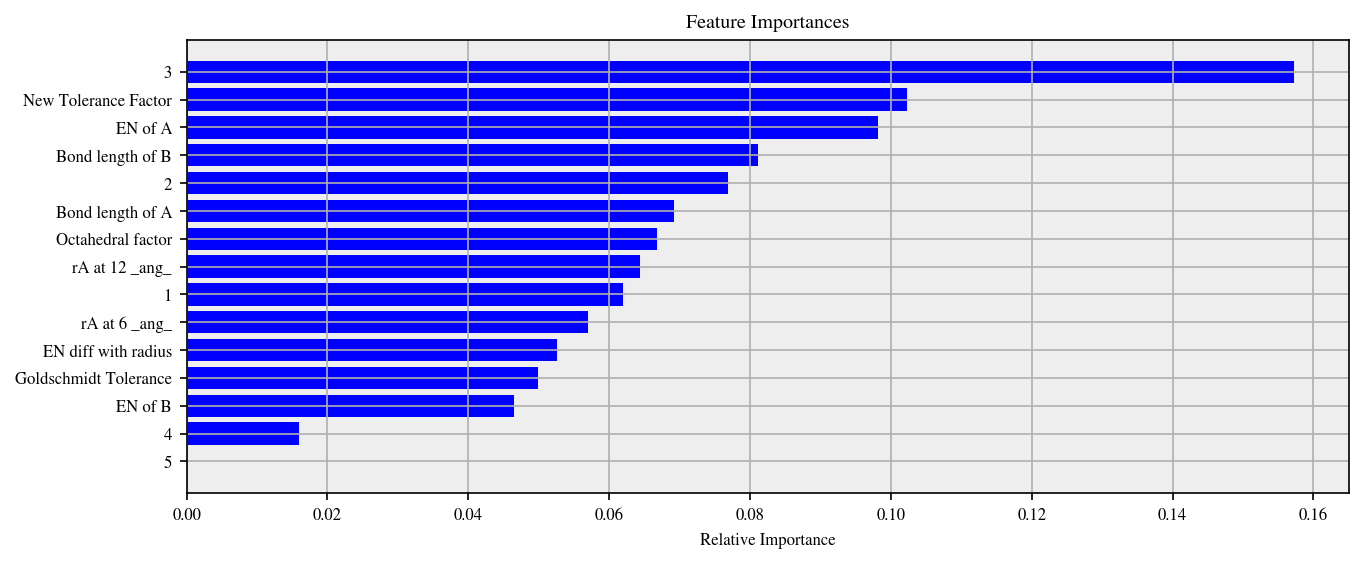

In [189]:
features = X_new.columns
importances = model1.feature_importances_
indices = np.argsort(importances)

#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [96]:
#acc with only valence A = 0.6607387140902873
#array([[327,  48,   7,   0],
#       [ 74, 121,   8,   0],
#       [ 38,  27,  25,   3],
#       [ 24,  17,   2,  10]], dtype=int64)

#using VA/VB
#0.6566347469220246

#Without taking the valencies 
#acc=0.6061997703788748

# New tolerance factor performs better than tR
##takin en and bl
#acc=0.7209302325581395

#VA/VB and Valence B do not have any effect

# VA and VB also have no effect in the prediction and rB at 6 also has no effect
#acc=0.719562243502052

#limits TG .6 to 1.1
        # OF .414 to .732
## When taking the limits acc fell to 0.6920556920556921 and ignoring valencies
# limits and valencies gives highest acc yet 0.7638640429338104

# on hot enconding on valence A gives best acc yet =0.7656529516994633 this is in additional to the limits and removing empty valence values
# introducing EN diff gives acc=0.7692307692307693
#taking en diff with with radius multiplied increased the acc to = 0.774597495527728


#taking the false data as the train data and true data as the test data
#acc=0.8555555555555555


## Decision Tree

In [97]:
model3.fit(X_new, y_new)
model3.score(X_new,y_new)

1.0

In [98]:
model3.score(x_true,y_true)

0.65

In [99]:
preds = model3.predict(x_true)
accuracy_score(preds,y_true)

0.65

In [100]:
confusion_matrix(preds,y_true)

array([[ 11,  44,   1,   0],
       [  2, 105,   4,   3],
       [  0,   6,   1,   0],
       [  1,   0,   2,   0]], dtype=int64)

In [101]:
pd.Series(preds).value_counts()

1    114
0     56
2      7
3      3
dtype: int64

## Random Forest

In [102]:
model4.fit(X_new, y_new)
model4.score(X_new,y_new)

1.0

In [103]:
model4.score(x_true,y_true)

0.7222222222222222

In [104]:
accuracy_score(preds,y_true)

0.65

In [105]:
confusion_matrix(preds,y_true)

array([[ 11,  44,   1,   0],
       [  2, 105,   4,   3],
       [  0,   6,   1,   0],
       [  1,   0,   2,   0]], dtype=int64)

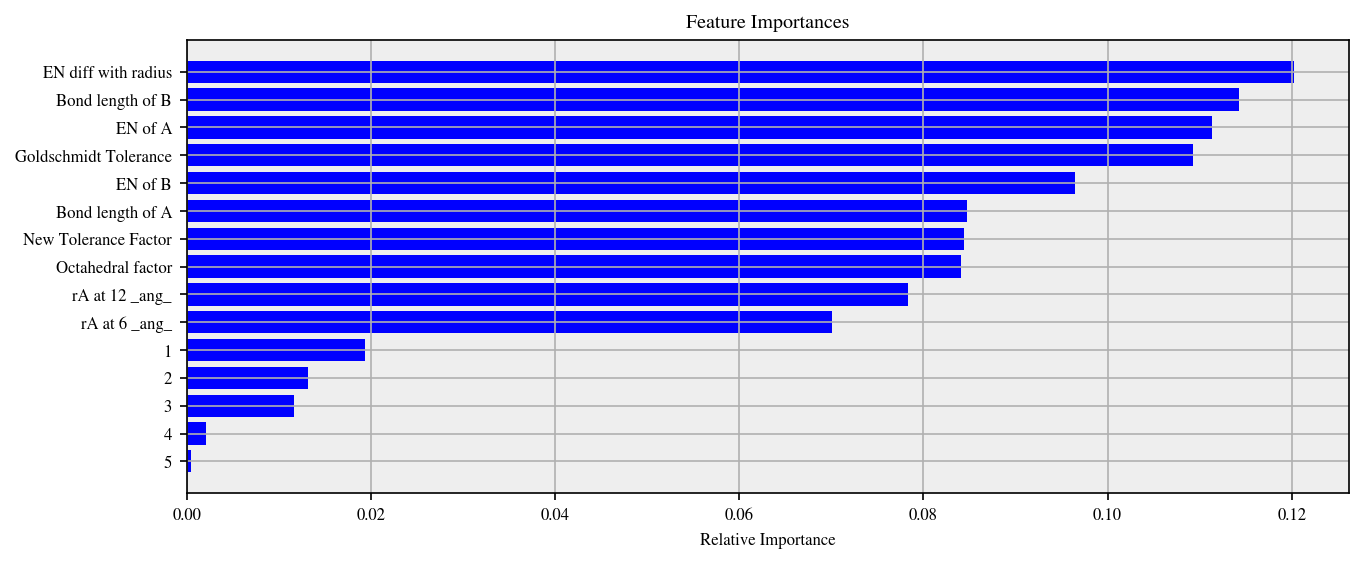

In [106]:
features = X_new.columns
importances = model4.feature_importances_
indices = np.argsort(importances)

#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [107]:
#with both valence a and b
#0.7113543091655267
#array([[381,  71,  10,   4],
#       [ 64, 113,   9,   3],
#       [ 13,  21,  22,   2],
#       [  5,   8,   1,   4]], dtype=int64)

#without valence B
#unchanged.

#Using VA/VB
#0.7099863201094391

#using en and bl
#acc=0.7346101231190151




In [195]:
import plotly

In [ ]:
#3,New Tolerance Factor, EN of A, Bond length of B, 2

In [202]:
import plotly.express as px
fig = px.scatter_3d(x=exp_true['Bond length of B'], y=exp_true['New Tolerance Factor'],z=exp_true['Bond length of A'],color=true_categorical['Lowest distortion'])
fig.show()